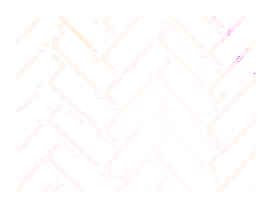

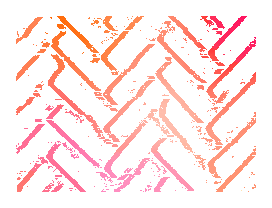

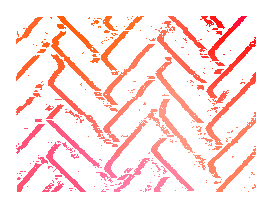

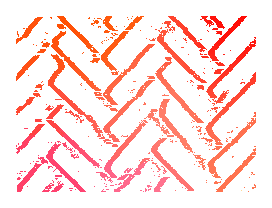

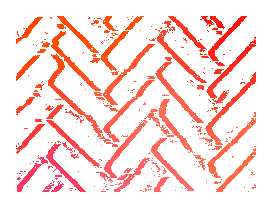

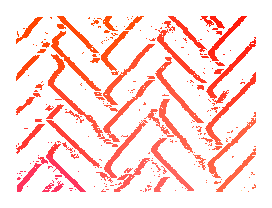

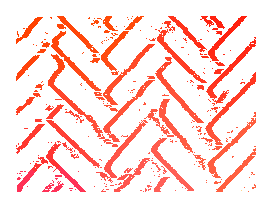

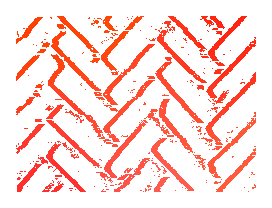

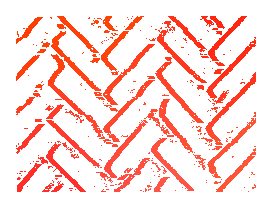

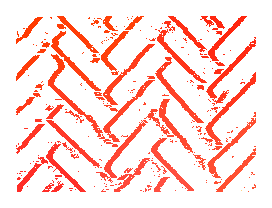

(208, 272, 2)


In [81]:
import numpy as np
import flow_vis
import command 
from IPython.display import Image, display

bin_path = 'result/flo_{:1d}_{:05d}.bin'
png_path = 'result/flo_{:1d}_{:05d}.png'
W, H, C = 272,208, 2
run_cpp= True

if run_cpp:
    res = command.run(['./process', '64']) 
    print(res.output) 
    print(res.exit)

for index in [0]:
    for itr in range(10):
        flo = np.fromfile(bin_path.format(index, itr), dtype=np.float64).reshape([H,W,C])
        flow_vis.save_flo(flo, png_path.format(index, itr))
        display(Image(filename=png_path.format(index, itr))) 

print(flo.shape)

